<a href="https://colab.research.google.com/github/ThuanPhong0126/Machine-Learning-from-scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [ ]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [ ]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [ ]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [ ]:
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [ ]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)

X = df.drop(columns=["Unnamed: 0", "ChestPain", "Thal"])
y= df["AHD"]

In [ ]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


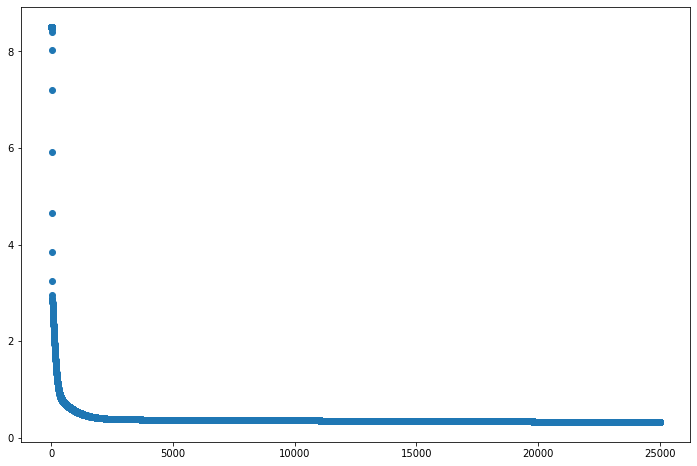

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()